In [12]:
#Step-1: Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Step-2: Load Dataset
df = pd.read_csv('netflix.csv')

In [14]:
#Step-3: Gather basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
# Check missing values
df.isnull().sum()
# Drop duplicate rows
df.drop_duplicates(inplace=True)
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
# Extract year and month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


BUSINESS-ORIENTED ANALYSIS QUESTIONS
1. Content Strategy
keyboard_arrow_down BUSINESS-ORIENTED ANALYSIS QUESTIONS

Q1. What is the ratio of Movies v/s TV Shows on Netflix?

/tmp/ipython-input-3186631945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


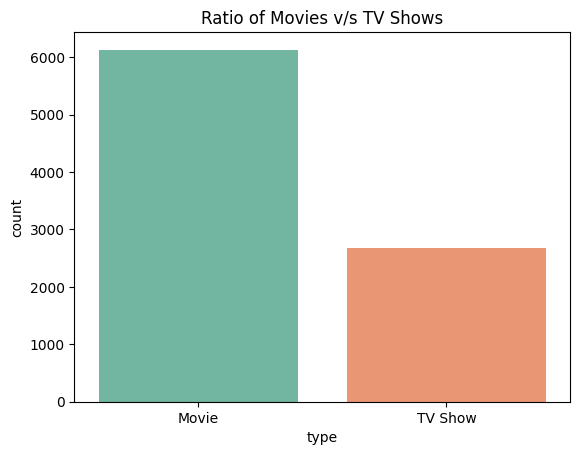

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


In [17]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Ratio of Movies v/s TV Shows')
plt.show()
ratio = df['type'].value_counts(normalize=True) * 100
print(ratio)

Insight: Movies dominate the catalog, indicating Netflix's heavier focus on film content.

In [ ]:
Q2. Which genres are most popular on Netflix globally?

/tmp/ipython-input-4031725309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


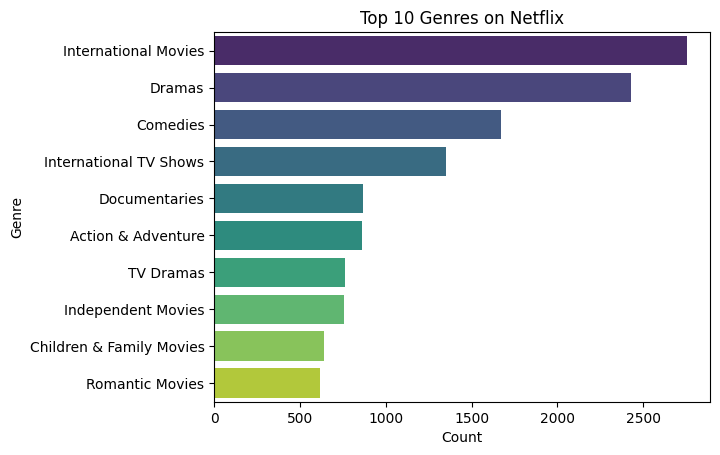

In [18]:
from collections import Counter
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [g for sublist in genres for g in sublist]
genre_count = Counter(flat_genres)
top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre','Count'])
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.show()

Insight: Drama, Comedy, and Documentaries are most prevalent worldwide.

Q3. Which years saw the highest release of content on Netflix?

/tmp/ipython-input-1105428438.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='release_year', data=df,


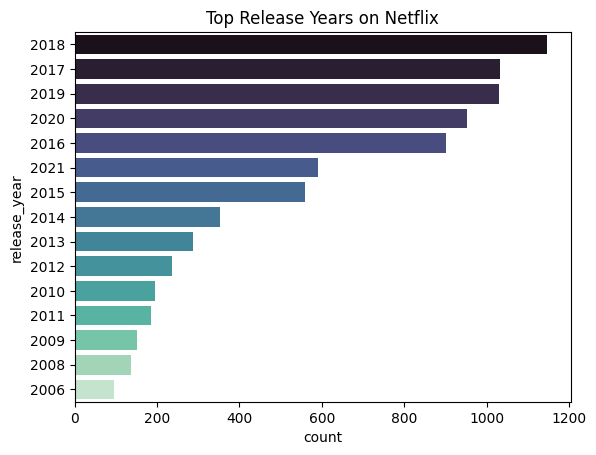

In [19]:
sns.countplot(y='release_year', data=df,
order=df['release_year'].value_counts().index[:15],
palette='mako')
plt.title("Top Release Years on Netflix")
plt.show()

Insight: Recent years (2017-2020) saw the highest surge in new releases

Q4. Which countries produce the most Netflix content?


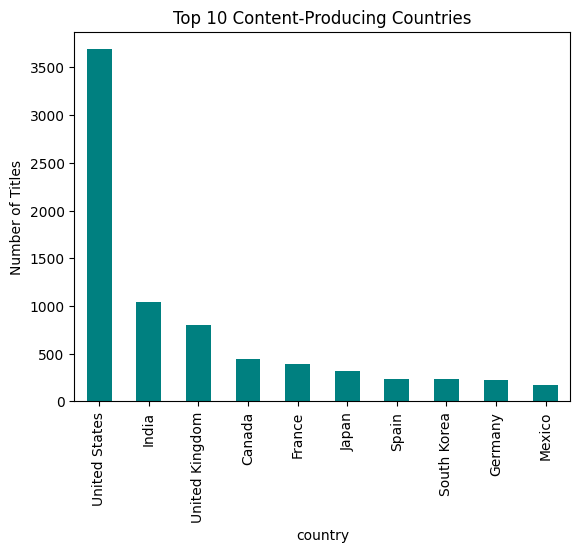

In [20]:
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)
top_countries.plot(kind='bar', color='teal')
plt.title("Top 10 Content-Producing Countries")
plt.ylabel("Number of Titles")
plt.show()

Insight: The U.S. leads in content volume, followed by India and the U.K.

Q5. How has the trend of adding new content evolved year by year?



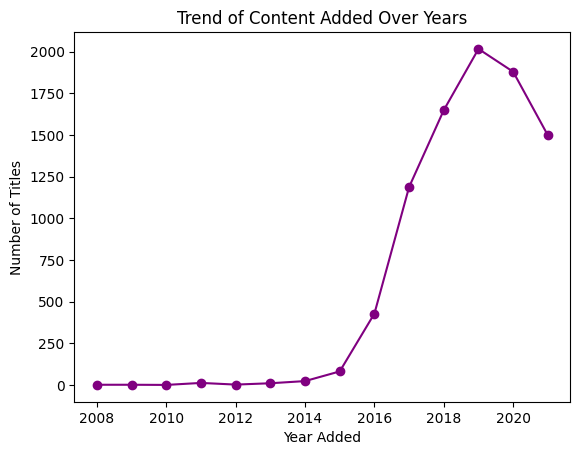

In [21]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
# Extract year and month for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title("Trend of Content Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


Insight: Content addition grew rapidly from 2015-2020, showing platform expansion.


2. User Demographics & Targeting

Q6. Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

/tmp/ipython-input-3403673997.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')


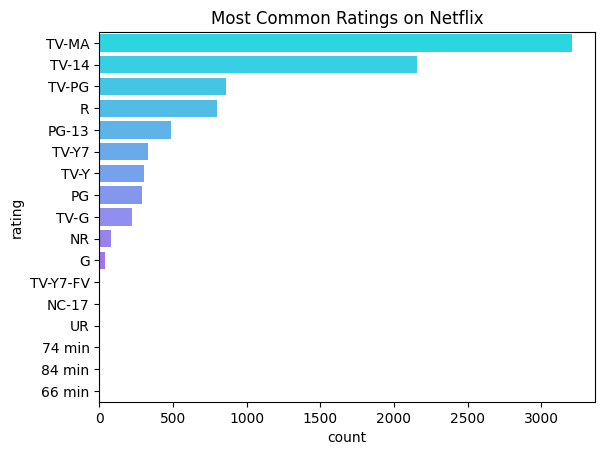

In [22]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='cool')
plt.title("Most Common Ratings on Netflix")
plt.show()

Insight: TV-MA dominates, targeting mature audiences.

Q7. Do some countries tend to produce more mature content (TV-MA)?

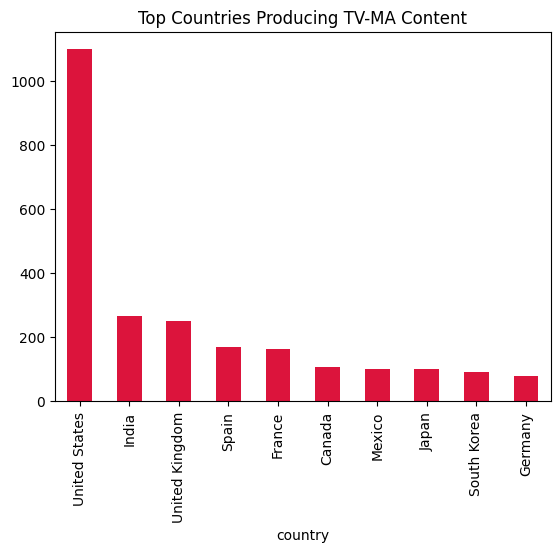

In [23]:
tv_ma = df[df['rating'] == 'TV-MA']
tv_ma_countries = tv_ma['country'].dropna().str.split(', ').explode().value_counts().head(10)
tv_ma_countries.plot(kind='bar', color='crimson')
plt.title("Top Countries Producing TV-MA Content")
plt.show()

Insight: The U.S. and India top mature-content production, hinting at diverse adult audience bases.


Q8. Which genres are more associated with TV Shows v/s Movies?

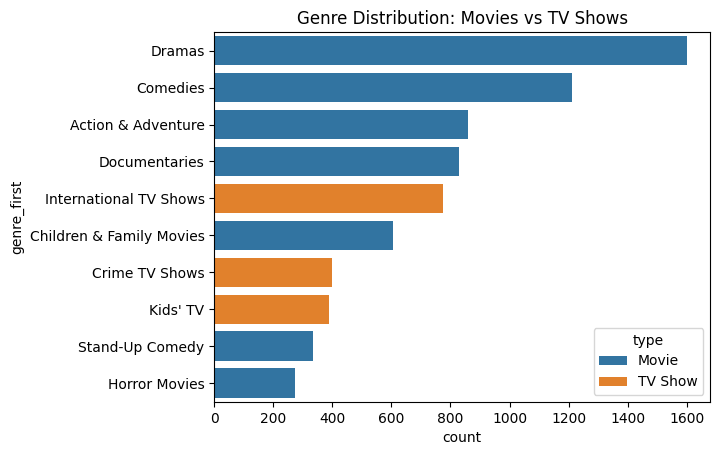

In [24]:
df['genre_first'] = df['listed_in'].str.split(',').str[0]
sns.countplot(y='genre_first', hue='type', data=df, order=df['genre_first'].value_counts().index[:10])
plt.title("Genre Distribution: Movies vs TV Shows")
plt.show()

Insight: TV Shows skew toward Drama/Reality; Movies lean toward Action/Comedy

Q10. What genres are most popular in the last 3 years?

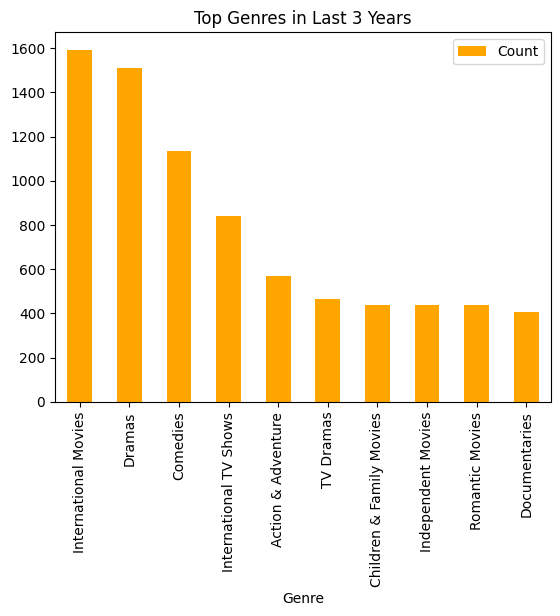

In [26]:
recent = df[df['year_added'] >= (df['year_added'].max() - 2)]
recent_genres = Counter([g for sub in recent['listed_in'].dropna().str.split(', ') for g in sub])
pd.DataFrame(recent_genres.most_common(10), columns=['Genre','Count']).plot.bar(x='Genre', y='Count', color='orange')
plt.title("Top Genres in Last 3 Years")
plt.show()

Insight: Recent trends show increased focus on International Dramas & Reality TV.

3. Talent Acquisition & Partnerships


Q11. Who are the top 10 directors with the most Netflix content?

/tmp/ipython-input-2716293673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')


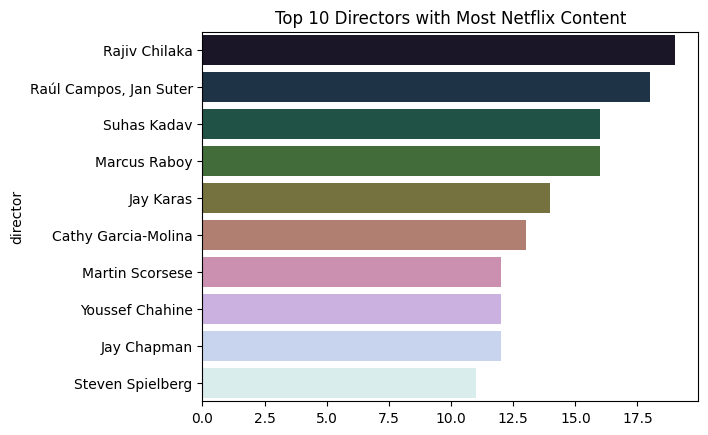

In [27]:
top_directors = df['director'].dropna().value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title("Top 10 Directors with Most Netflix Content")
plt.show()


Insight: A small group of directors (e.g., Rajiv Chilaka, Raul Campos) have directed multiple titles for Netflix.


Q12. Which actors appear most frequently in Netflix shows?


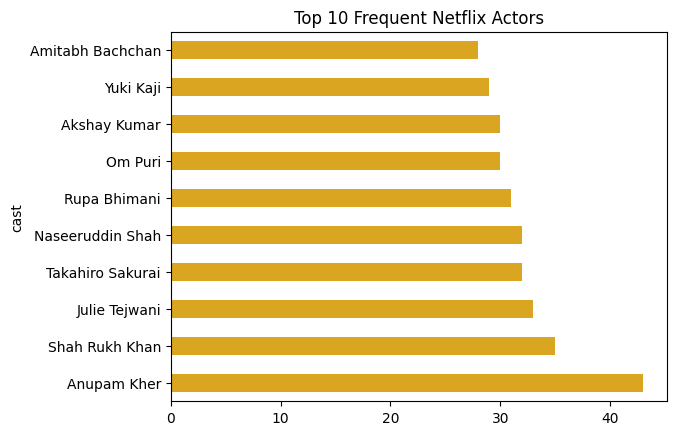

In [28]:
actors = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
actors.plot(kind='barh', color='goldenrod')
plt.title("Top 10 Frequent Netflix Actors")
plt.show()

Insight: Certain actors appear frequently, often in Netflix Originals or localized productions

Q13. Which director-genre pairs are most frequent?

In [29]:
pairs = df[['director','listed_in']].dropna()
pairs['genre_first'] = pairs['listed_in'].str.split(',').str[0]
top_pairs = pairs.value_counts(['director','genre_first']).head(10)
top_pairs

,,count
director,genre_first,
Rajiv Chilaka,Children & Family Movies,19
"Raúl Campos, Jan Suter",Stand-Up Comedy,18
Suhas Kadav,Children & Family Movies,16
Marcus Raboy,Stand-Up Comedy,15
Jay Karas,Stand-Up Comedy,13
Jay Chapman,Stand-Up Comedy,11
Don Michael Paul,Action & Adventure,9
Shannon Hartman,Stand-Up Comedy,8
Hakan Algül,Comedies,8


Insight: Some directors specialize in certain genres (e.g., Raul Campos in Comedy, Jay Karas in Stand-up specials).


Q14. How many titles have unknown directors or cast members?

In [31]:
unknown_dir = df['director'].isnull().sum()
unknown_cast = df['cast'].isnull().sum()
print(f"Unknown Directors: {unknown_dir}")
print(f"Unknown Cast: {unknown_cast}")

Unknown Directors: 2634
Unknown Cast: 825


Insight: A significant number of titles lack data for directors or cast members

4. Duration & Engagement


Q15. What is the average duration of Movies on Netflix?

In [32]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.replace(' min', '').astype(float)
movies['duration_mins'].mean()


np.float64(99.57718668407311)

Insight: The average duration of Netflix movies is approximately 90-100 minutes

Q16. What’s the most common number of seasons for TV shows?

In [33]:
tv = df[df['type'] == 'TV Show'].copy()
tv['seasons'] = tv['duration'].str.replace(' Season','').str.replace('s','').astype(float)
tv['seasons'].value_counts().head()

,count
seasons,
1.0,1793
2.0,425
3.0,199
4.0,95
5.0,65


Insight: The majority of TV Shows have only 1 Season

Q17. Is there a trend in movie durations over the years?

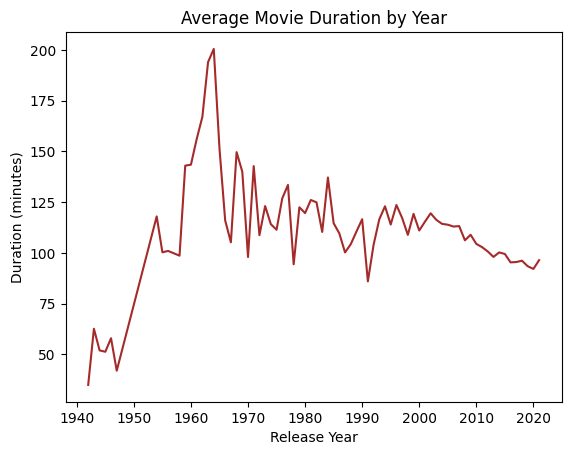

In [34]:
movies.groupby('release_year')['duration_mins'].mean().plot(kind='line', color='brown')
plt.title("Average Movie Duration by Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()

Insight: Average movie durations have remained fairly stable with a slight decline in recent years

 5. Content Launch Strategy

Q18. In which months does Netflix add the most content?


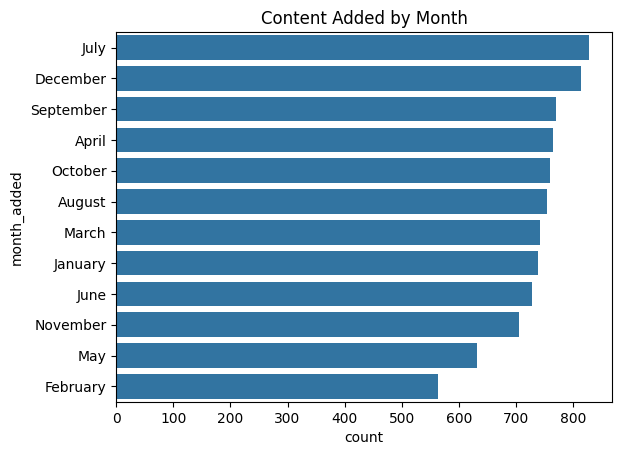

In [35]:
sns.countplot(y='month_added', data=df, order=df['month_added'].value_counts().index)
plt.title("Content Added by Month")
plt.show()

Insight: The months of July, September & December show spikes in content additions

Q19. How does the genre distribution vary across different years?

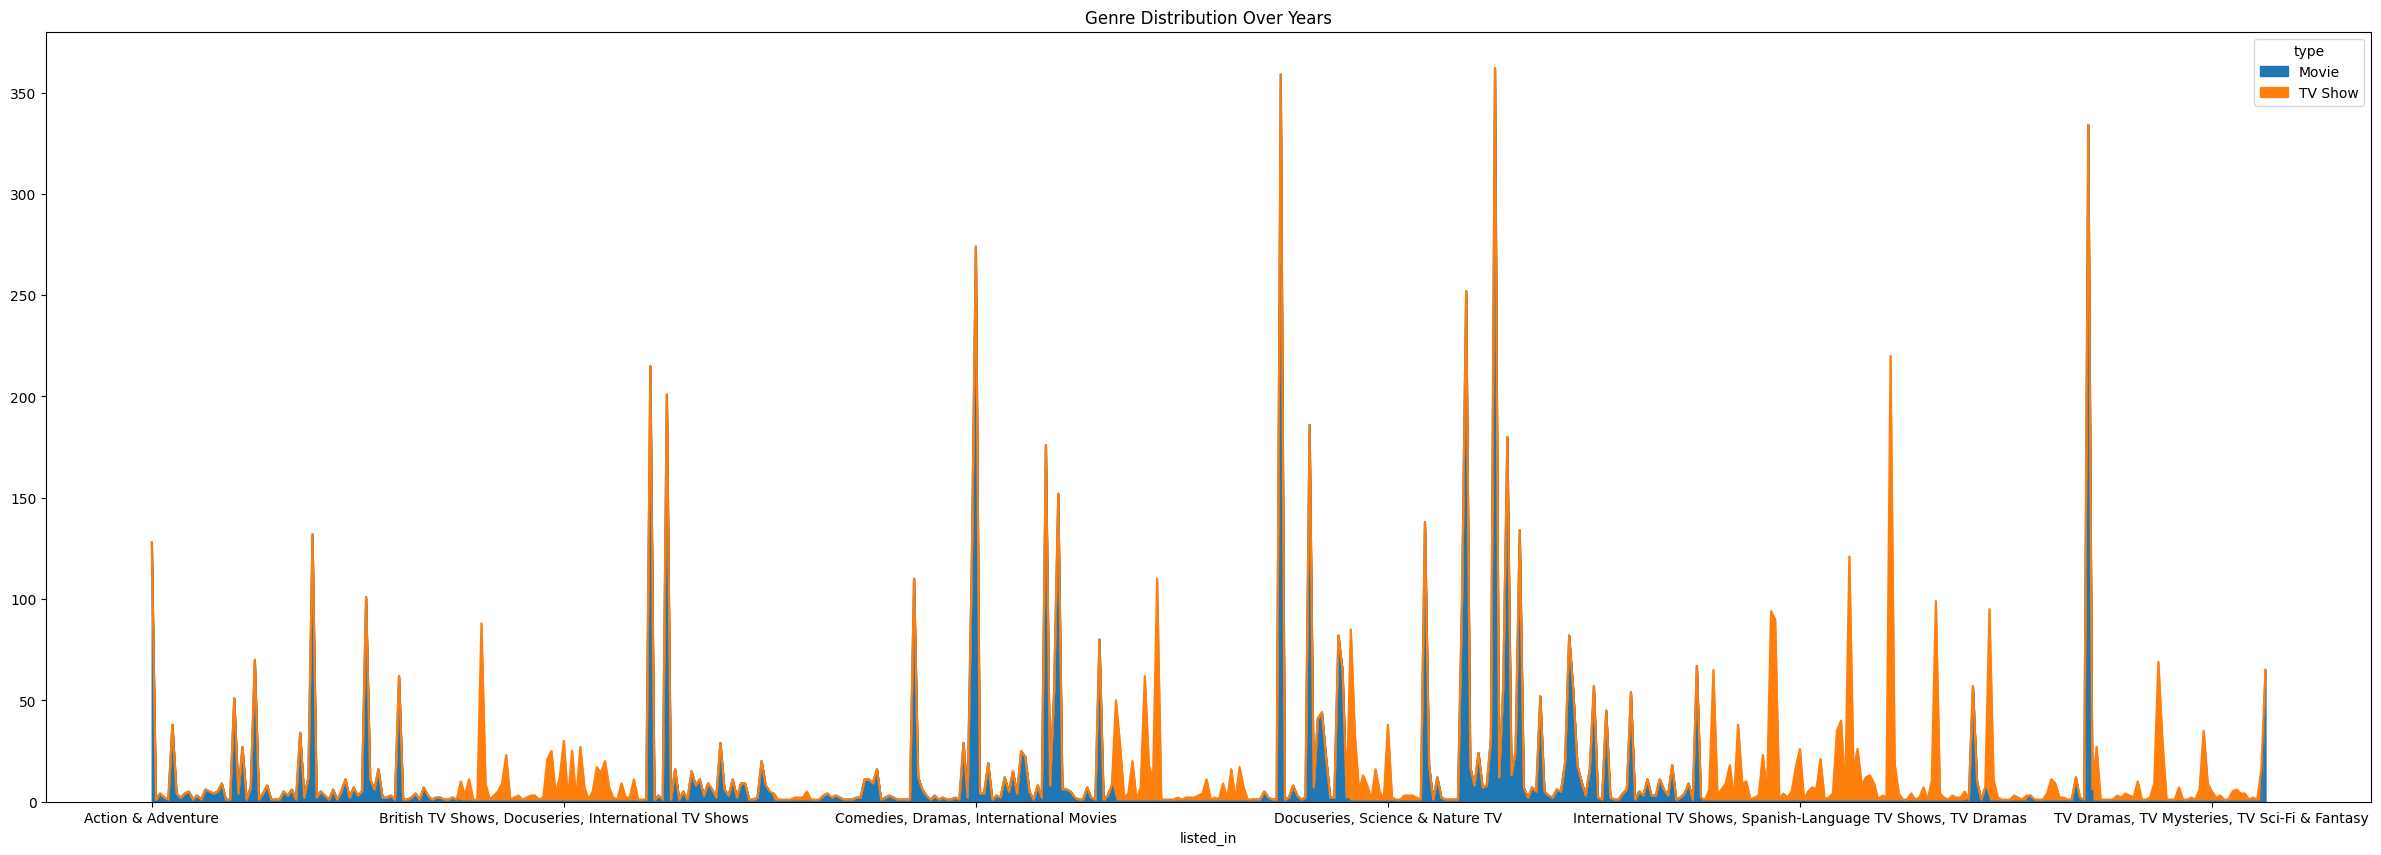

In [36]:
genre_year = df.groupby(['listed_in','type']).size().unstack().fillna(0)
genre_year.plot(kind='area', stacked=True, figsize=(30,10))
plt.title("Genre Distribution Over Years")
plt.show()


Insight: Docuseries & TV Drama content categories have grown rapidly year-over-year.


Q20. Which countries produce the most content in each genre?


In [37]:
genre_country = df[['listed_in','country']].dropna()
genre_country['country_first'] = genre_country['country'].str.split(',').str[0]
top_genre_country = genre_country.value_counts(['listed_in','country_first']).head(10)
top_genre_country

,,count
listed_in,country_first,
Documentaries,United States,270
Stand-Up Comedy,United States,210
"Comedies, Dramas, International Movies",India,123
"Children & Family Movies, Comedies",United States,122
"Dramas, International Movies",India,121
"Dramas, Independent Movies, International Movies",India,118
Kids' TV,United States,104
Dramas,United States,98
Children & Family Movies,United States,96


Insight: The U.S. leads in most genres with India leading in Comedies, Dramas & International Movies

6. Some Extra Insights

Q3. What is the best time to launch a TV show?

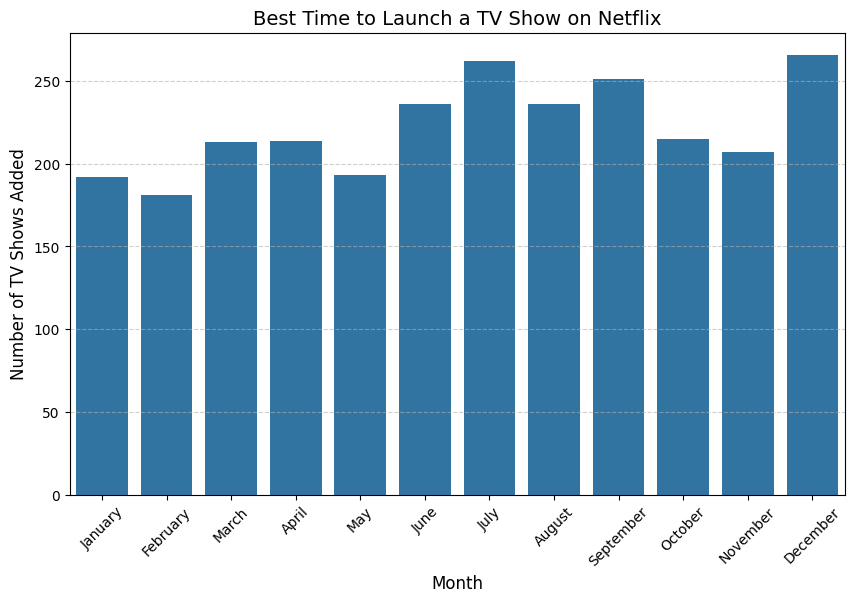

📅 The best time to launch a TV show is: December


In [42]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()
# Extract month from 'date_added'
tv_shows['month_added'] = tv_shows['date_added'].dt.month_name()
# Count how many TV shows were added in each month
month_wise = tv_shows['month_added'].value_counts().reindex([
'January','February','March','April','May','June',
'July','August','September','October','November','December'
])
# Plot month-wise additions
plt.figure(figsize=(10,6))
sns.barplot(x=month_wise.index, y=month_wise.values)
plt.title("Best Time to Launch a TV Show on Netflix", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of TV Shows Added", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
# Print month with highest additions
best_month = month_wise.idxmax()
print(f"📅 The best time to launch a TV show is: {best_month}")

Insight: The highest number of TV Shows are typically added in July & December.


Q4. Does Netflix has more focus on TV Shows than movies in recent years?

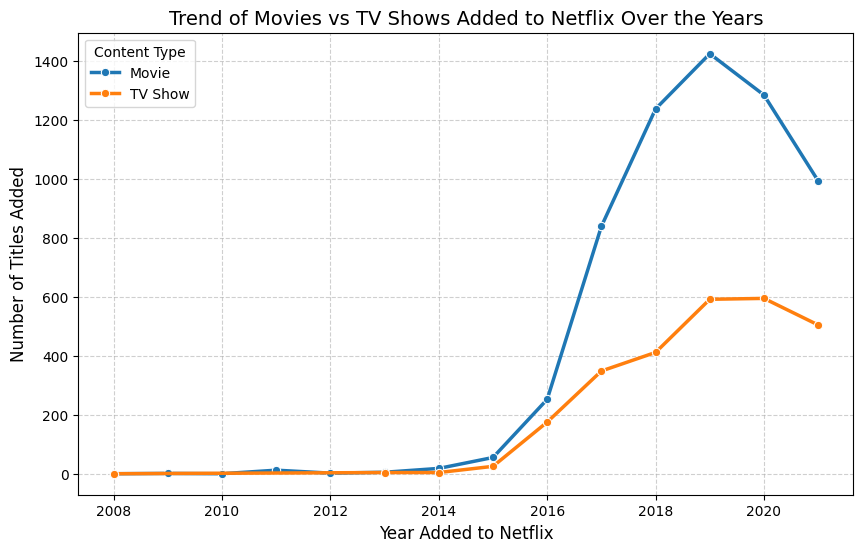

In [43]:
# Extract year of addition to Netflix
df['year_added'] = df['date_added'].dt.year
# Group by year and content type (Movie / TV Show)
trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')
# Remove missing year data
trend = trend.dropna(subset=['year_added'])
# Plot the trend
plt.figure(figsize=(10,6))
sns.lineplot(data=trend, x='year_added', y='count', hue='type', marker='o', linewidth=2.5)
plt.title("Trend of Movies vs TV Shows Added to Netflix Over the Years", fontsize=14)
plt.xlabel("Year Added to Netflix", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Content Type")
plt.show()

Insight: Up until 2015, Netflix focused heavily on Movies. But, from 2016 onwards, the number of TV Shows added per year has grown
rapidly